In [25]:
import numpy as np #import numpy library
import pandas as pd #import pandas library
import matplotlib.pyplot as plt #import matplot library
%matplotlib inline
import nltk.classify.util
from astropy.table import Table, Column

In [26]:
#import data

#load files
dataMerge = pd.read_csv('sarahYee/sarahMergedBio.csv')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
#fix time
dataMerge['timestamp'] = pd.to_datetime(dataMerge['timestamp'], unit='s')

In [28]:
#make sure all merged properly!
print(dataMerge.shape) #print data rows and columns
dataMerge.head(5) #limit data to 5 rows including a header row 

(18540, 37)


,timestamp,date,month,day,time,hour,min,heartrate,steps,calories,...,angry,angryscore,hungry,hungerscore,tired,tiredscore,bored,boredscore,location,blurb
0,2016-04-22 00:00:00,4/22/16,4,22,12:00:00 AM,0,0:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-22 00:01:00,4/22/16,4,22,12:01:00 AM,0,1:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-04-22 00:02:00,4/22/16,4,22,12:02:00 AM,0,2:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-04-22 00:03:00,4/22/16,4,22,12:03:00 AM,0,3:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-04-22 00:04:00,4/22/16,4,22,12:04:00 AM,0,4:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
dataMerge.dtypes

timestamp       datetime64[ns]
date                    object
month                    int64
day                      int64
time                    object
hour                     int64
min                     object
heartrate              float64
steps                  float64
calories               float64
gsr                    float64
skintemp               float64
airtemp                float64
walk                   float64
bike                   float64
run                    float64
sleep                  float64
excited                float64
excitedscore           float64
happy                  float64
happyscore             float64
calm                   float64
calmscore              float64
anxious                float64
anxiousscore           float64
sad                    float64
sadscore               float64
angry                  float64
angryscore             float64
hungry                 float64
hungerscore            float64
tired                  float64
tiredsco

In [36]:
dataMerge.gsr = dataMerge.gsr.fillna(0)
dataMerge.heartrate = dataMerge.heartrate.fillna(0)
dataMerge.steps = dataMerge.steps.fillna(0)
dataMerge.calories = dataMerge.calories.fillna(0)
dataMerge.skintemp = dataMerge.skintemp.fillna(0)
dataMerge.airtemp = dataMerge.airtemp.fillna(0)

dataMerge.excited = dataMerge.excited .fillna(0)
dataMerge.excitedscore = dataMerge.excitedscore.fillna(0)
dataMerge.happy = dataMerge.happy.fillna(0)
dataMerge.happyscore = dataMerge.happyscore.fillna(0)
dataMerge.calm = dataMerge.calm.fillna(0)
dataMerge.calmscore = dataMerge.calmscore.fillna(0)
dataMerge.anxious = dataMerge.anxious.fillna(0)
dataMerge.anxiousscore = dataMerge.anxiousscore.fillna(0)
dataMerge.sad = dataMerge.sad.fillna(0)
dataMerge.sadscore = dataMerge.sadscore.fillna(0)
dataMerge.angry = dataMerge.gsr.fillna(0)
dataMerge.angryscore = dataMerge.heartrate.fillna(0)

dataMerge.hungry = dataMerge.hungry.fillna(0)
dataMerge.hungerscore = dataMerge.hungerscore.fillna(0)
dataMerge.tired = dataMerge.tired.fillna(0)
dataMerge.tiredscore = dataMerge.tiredscore.fillna(0)
dataMerge.bored = dataMerge.bored.fillna(0)
dataMerge.boredscore = dataMerge.boredscore.fillna(0)

In [37]:
dataMerge.excited.mean()

0.012837108953613808

In [38]:
dataMerge.happy.mean()

0.038349514563106799

In [39]:
dataMerge.calm.mean()

0.16650485436893203

In [40]:
dataMerge.anxious.mean()

0.20129449838187702

In [41]:
dataMerge.sad.mean()

0.004638619201725998

In [42]:
dataMerge.angry.mean()

0.042450277292340889

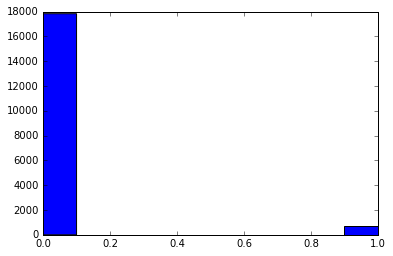

In [46]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(dataMerge["happy"])

# Show the plot.
plt.show()

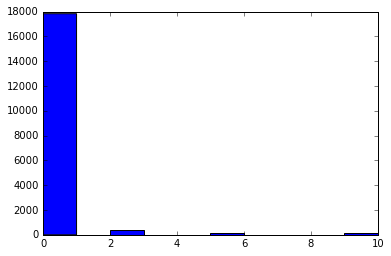

In [47]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(dataMerge["happyscore"])

# Show the plot.
plt.show()

In [92]:
dataMerge['tempDiff'] = dataMerge['skintemp'] - dataMerge['airtemp']

dataMerge['lowHR'] = dataMerge['heartrate'] < 60
dataMerge['highHR'] = dataMerge['heartrate'] > 90

dataMerge['lowGSR'] = dataMerge['gsr'] < 1
dataMerge['highGSR'] = dataMerge['gsr'] > 5

dataMerge['lowCalories'] = dataMerge['calories'] <= 5
dataMerge['highCalories'] = dataMerge['calories'] > 10

dataMerge['lowSteps'] = dataMerge['steps'] <= 5
dataMerge['highStep'] = dataMerge['steps'] > 10

dataMerge['lowSteps'] = dataMerge['steps'] <= 5
dataMerge['highStep'] = dataMerge['steps'] > 10

In [93]:
print(dataMerge['tempDiff'].values)

[ 0.  0.  0. ...,  0.  0.  0.]


In [94]:
dataMerge['tempDiff'].mean()

3.229368932038835

In [95]:
tempDiff = dataMerge.iloc[:, 37].values.reshape(dataMerge.shape[0], 1)

lowHR = dataMerge.iloc[:, 38].values.reshape(dataMerge.shape[0], 1)
highHR = dataMerge.iloc[:, 39].values.reshape(dataMerge.shape[0], 1)

lowGSR = dataMerge.iloc[:, 40].values.reshape(dataMerge.shape[0], 1)
highGSR= dataMerge.iloc[:, 41].values.reshape(dataMerge.shape[0], 1)


dataMerge.head()

,timestamp,date,month,day,time,hour,min,heartrate,steps,calories,...,tired,tiredscore,bored,boredscore,location,blurb,tempDiff,lowHR,highHR,lowSteps
0,2016-04-22 00:00:00,4/22/16,4,22,12:00:00 AM,0,0:00,0,0,0,...,0,0,0,0,NaN,NaN,0,True,True,True
1,2016-04-22 00:01:00,4/22/16,4,22,12:01:00 AM,0,1:00,0,0,0,...,0,0,0,0,NaN,NaN,0,True,True,True
2,2016-04-22 00:02:00,4/22/16,4,22,12:02:00 AM,0,2:00,0,0,0,...,0,0,0,0,NaN,NaN,0,True,True,True
3,2016-04-22 00:03:00,4/22/16,4,22,12:03:00 AM,0,3:00,0,0,0,...,0,0,0,0,NaN,NaN,0,True,True,True
4,2016-04-22 00:04:00,4/22/16,4,22,12:04:00 AM,0,4:00,0,0,0,...,0,0,0,0,NaN,NaN,0,True,True,True


In [66]:

Xtoadd = np.concatenate(( tempDiff ), axis=1)

dataMerge.head()

IndexError: axis 1 out of bounds [0, 1)

In [62]:
# report on training and test sets
global SVMerror, SVMacc, SVMtp, SVMtn, LRerror, LRacc, LRtp, LRtn, NBerror, NBacc, NBtp, NBtn, Perror, Pacc, Ptp, Ptn



def print_results(model):
    #print('Error rate on training set: ')
    erTRAIN = ((y_train != y_pred).sum() / X_train.shape[0])
    #print('Accuracy rate on training set: ')
    AccTRAIN = (1 - (y_train != y_pred).sum() / X_train.shape[0])
    #print('True positive rate on training tet:')
    TruPosTRAIN = ((y_train==True) & (y_pred==True)).sum() / y_train.sum()
    #TruNegTEST = (((y_train==False) & (y_pred_train==False)).sum() / (y_train.shape[0] - y_train.sum()))
    #print('**************')
    #('Error rate on test set: ')
    erTEST = ((y_test != y_pred_test).sum() / X_test.shape[0])
    #print('Accuracy rate on test set: ')
    AccTEST = (1 - (y_test != y_pred_test).sum() / X_test.shape[0])
    #print('True positive rate on test set')
    TruPosTEST = (((y_test==True) & (y_pred_test==True)).sum() / y_test.sum())
    #print('True negative rate on test set')
    TruNegTEST = (((y_test==False) & (y_pred_test==False)).sum() / (y_test.shape[0] - y_test.sum()))
    data_rows = [('Error Rate', erTRAIN, erTEST),
                 ('Accuracy Rate', AccTRAIN, AccTEST),
                 ('True Positives', TruPosTRAIN, TruPosTEST),
                 ('True Negatives', '--', TruNegTEST)]
    t = Table(rows=data_rows, names=(model, 'Training Set', 'Test Set'), meta={'name': model + ': Training and Test Set Results'})
    print(t)
    if model == 'SVM':
        SVMerror = erTEST
        SVMacc = AccTEST
        SVMtp = TruPosTEST
        SVMtn = TruNegTEST
        return(SVMerror, SVMacc, SVMtp, SVMtn)
    elif model == 'Logistic Regression':
        LRerror = erTEST
        LRacc = AccTEST
        LRtp = TruPosTEST
        LRtn = TruNegTEST
        return(LRerror, LRacc, LRtp, LRtn)
    elif model == 'Naive Bayes':
        NBerror = erTEST
        NBacc = AccTEST
        NBtp = TruPosTEST
        NBtn = TruNegTEST
        return(NBerror, NBacc, NBtp, NBtn)
    elif model == 'Perceptron':
        Perror = erTEST
        Pacc = AccTEST
        Ptp = TruPosTEST
        Ptn = TruNegTEST
        return(Perror, Pacc, Ptp, Ptn)
    print('done')
      
    #t.show_in_browser(jsviewer=True) 
    
    
def all_models_table():
    all_rows = [('SVM', SVMerror, SVMacc, SVMtp, SVMtn),
            ('Logistic Regression', LRerror, LRacc, LRtp, LRtn),
            ('Naive Bayes', NBerror, NBacc, NBtp, NBtn),
            ('Perceptron', Perror, Pacc, Ptp, Ptn)]
    tt = Table(rows=all_rows, names=('', 'Error Rate', 'Accuracy', 'True +', 'True -'), meta={'3/15/2016'})
    print(tt)